### Analysis of the dataset

This dataset represents the descriptive metadata from the [Moving Image Archive catalogue](https://data.nls.uk/data/metadata-collections/moving-image-archive/), which is Scotland’s national collection of moving images.

In [1]:
import pandas as pd
import re

#### Loading the CSV data into pandas

In [2]:
path_csv = "data/output/movingImageArchive.csv"
df = pd.read_csv (path_csv, sep=',')

In [3]:
## structure of the data
print(df.columns.tolist())

## set summary column type to string
df = df.astype({"summary": str})
print(df.dtypes)

['title', 'author', 'place_publication', 'date', 'extent', 'credits', 'subjects', 'summary', 'details', 'link', 'geographicNames']
title                 object
author                object
place_publication     object
date                 float64
extent                object
credits               object
subjects              object
summary               object
details               object
link                  object
geographicNames       object
dtype: object


In [4]:
print(df["summary"].head(10))

0    The Botanic Gardens, Glasgow with shots of the...
1    Footage of the last trams to run in Glasgow, a...
2    The story of the last Edinburgh tram.  Shots o...
3    Footage of the last tram to run in Glasgow. Th...
4    Scottish school pupils studying scientific and...
5    Glasgow University celebrates its Fifth Centen...
6    Celebrations in Glasgow attended by students f...
7    Procession of dignitaries in horse-drawn carri...
8    Harry Lauder leaves for Liverpool from London'...
9    A selection of amateur films made in the early...
Name: summary, dtype: object


### Prepare the text 

In [5]:
# Remove punctuation
df['summary_processed'] = df['summary'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['summary_processed'] = df['summary_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df['summary_processed'].head()

0    the botanic gardens glasgow with shots of the ...
1    footage of the last trams to run in glasgow an...
2    the story of the last edinburgh tram  shots of...
3    footage of the last tram to run in glasgow thi...
4    scottish school pupils studying scientific and...
Name: summary_processed, dtype: object

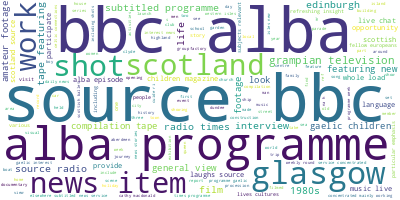

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different summaries together.
long_string = ','.join(list(df['summary_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## References

- https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0